In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable

## Loading the dataset to pandas dataframe

In [2]:
df=pd.read_csv(r"C:\Users\kingl\Downloads\dataset\P6-UK-Bank-Customers.csv")

In [3]:
df.sample(5)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
817,100000818,Tracey,Sharp,Female,47,England,White Collar,06.Jun.15,15879.06
3674,200003675,Lucas,Wright,Male,44,Scotland,Blue Collar,12.Dec.15,60052.58
3974,100003975,Colin,Lambert,Male,37,England,White Collar,28.Dec.15,10887.08
1555,100001556,Anna,Rampling,Female,25,England,White Collar,09.Aug.15,66105.55
3728,100003729,Joshua,Hart,Male,33,England,White Collar,15.Dec.15,22448.82


In [4]:
print("The dataset has {} rows and {} features".format(df.shape[0],df.shape[1]))

The dataset has 4014 rows and 9 features


In [5]:
# High level overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
Customer ID           4014 non-null int64
Name                  4014 non-null object
Surname               4014 non-null object
Gender                4014 non-null object
Age                   4014 non-null int64
Region                4014 non-null object
Job Classification    4014 non-null object
Date Joined           4014 non-null object
Balance               4014 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.4+ KB


In [6]:
df.describe()

,Customer ID,Age,Balance
count,4.014000e+03,4014.000000,4014.000000
mean,1.696831e+08,38.611111,39766.448274
std,8.865374e+07,9.819121,29859.489192
min,1.000000e+08,15.000000,11.520000
25%,1.000020e+08,31.000000,16115.367500
50%,1.000038e+08,37.000000,33567.330000
75%,2.000031e+08,45.000000,57533.930000
max,4.000038e+08,64.000000,183467.700000


## Check Duplicate and Null values

In [7]:
# Checking for null values
print(df.isnull().sum())
print("\nThe dataset doesnt have any null values")

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
dtype: int64

The dataset doesnt have any null values


In [8]:
df.columns

Index(['Customer ID', 'Name', 'Surname', 'Gender', 'Age', 'Region',
       'Job Classification', 'Date Joined', 'Balance'],
      dtype='object')

In [9]:
# checking for any duplicate 
print(df.duplicated(subset=['Name', 'Surname', 'Gender', 'Age', 'Region','Job Classification', 'Date Joined', 'Balance']).sum())


0


## EDA

In [10]:
# customers based on their  gender 
def countplot(val):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(x=val, data=df, order=df[val].value_counts().index)
    for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.ylabel('No of Customers',fontsize=12)
    plt.xlabel(val,fontsize=12)
    plt.title(val+' based customers count')
    plt.show()

In [11]:
def piplot(val):
    A=df.groupby(val)["Balance"].sum().index.tolist()
    B=df.groupby(val)["Balance"].sum().values
    plt.figure(figsize=(8,5))
    wp = { 'linewidth' : 3.0, 'edgecolor' : "white" }
    myexplode = [0.2, 0, 0]
    mycolors=colors = ['cyan','yellowgreen', 'gold','lightpink']
    plt.pie(B,labels=A,colors=mycolors,wedgeprops =wp,startangle=90,autopct='%1.1f%%')
    plt.legend(fontsize=12)
    plt.title("Total Balance based on "+val)
    plt.show()
    #-------------------------------------------------------------
    myTable = PrettyTable([val, "Balance (M)"])
    for c,eva in zip(A,B):
        myTable.add_row([c,round(int(eva)/1000000,2)])
    print(myTable)

In [12]:
def displot(val):
    sns.displot(data=df, x="Balance",hue=val, kind="kde")
    plt.show()

In [13]:
def boxplot(val):
    sns.boxplot(data=df,x="Balance",y=val)
    plt.show()

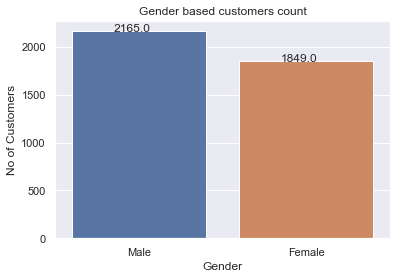

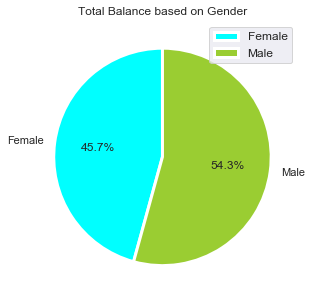

+--------+-------------+
| Gender | Balance (M) |
+--------+-------------+
| Female |    72.98    |
|  Male  |    86.64    |
+--------+-------------+


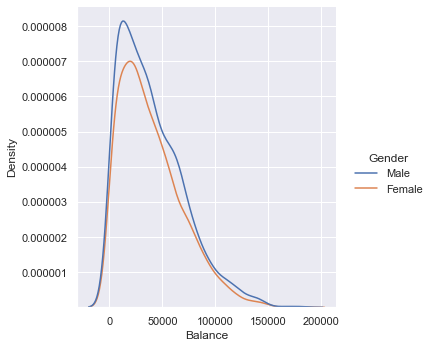

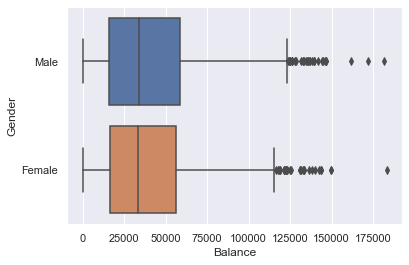

In [14]:
# GENDER 
countplot('Gender')
piplot('Gender')
displot('Gender')
boxplot('Gender')

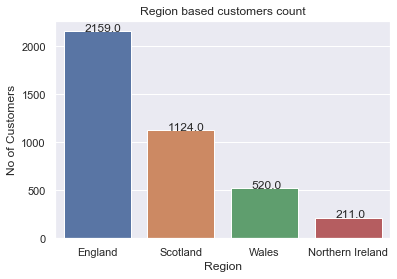

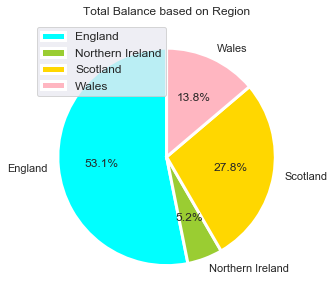

+------------------+-------------+
|      Region      | Balance (M) |
+------------------+-------------+
|     England      |    84.83    |
| Northern Ireland |     8.34    |
|     Scotland     |    44.41    |
|      Wales       |    22.04    |
+------------------+-------------+


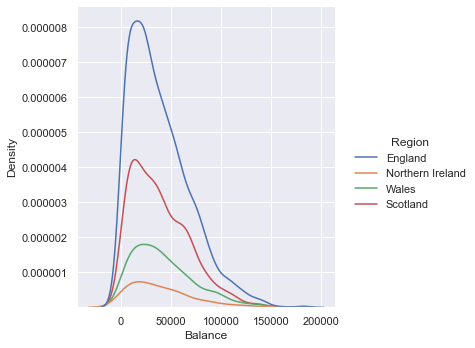

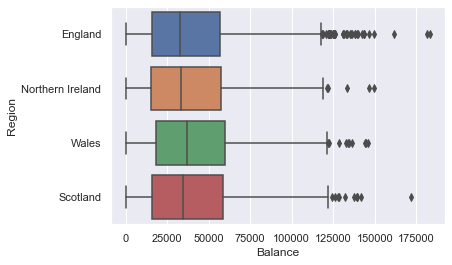

In [15]:
#Region
countplot('Region')
piplot('Region')
displot('Region')
boxplot('Region')

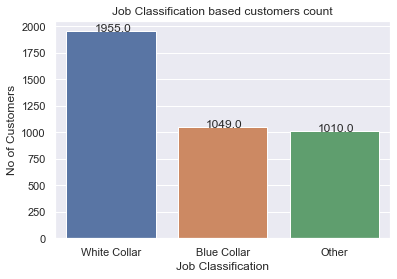

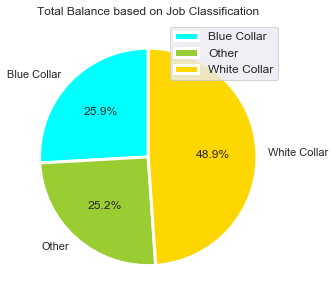

+--------------------+-------------+
| Job Classification | Balance (M) |
+--------------------+-------------+
|    Blue Collar     |    41.33    |
|       Other        |    40.22    |
|    White Collar    |    78.07    |
+--------------------+-------------+


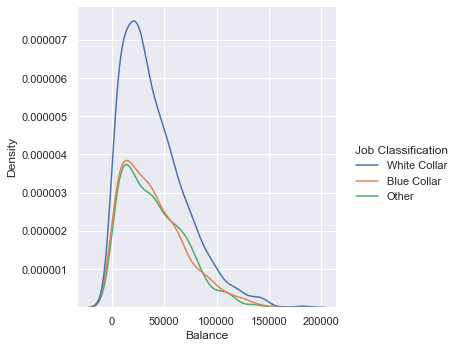

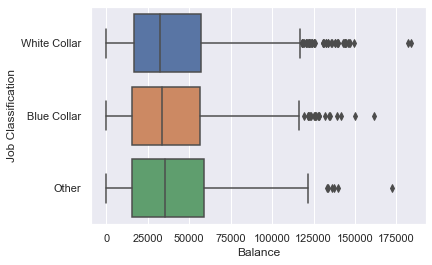

In [16]:
# Job Classification
countplot('Job Classification')
piplot('Job Classification')
displot('Job Classification')
boxplot('Job Classification')

## Data Cleaning

In [17]:
# Drop the column "Customer ID"
df.drop("Customer ID",inplace= True,axis=1)

In [18]:
# combining Name and Surname into an single column customer name
df["Customer name"]=df["Name"]+' '+df["Surname"]

In [19]:
# Drop Name and Surname columns from dataframe
df.drop(["Name","Surname"],inplace=True,axis=1)

In [20]:
# creating "Age Category" column
lst=[]
for a in df["Age"].values:
    if 17<= a <=20:
        lst.append("17-20")
        
    elif 21<= a <=30:
        lst.append("21-30")
    
    elif 31<= a <=40:
        lst.append("31-40")
        
    elif 41<= a <=50:
        lst.append("41-50")
    
    else:
        lst.append("51-Above")
    
df["Age Category"]=lst

In [21]:
# Formating the "Date Joined" Column
df["Joined Date"]=pd.to_datetime(df["Date Joined"])
df.drop(["Date Joined"],inplace=True,axis=1)

In [22]:
df.sample(5)

,Gender,Age,Region,Job Classification,Balance,Customer name,Age Category,Joined Date
1630,Female,28,England,White Collar,17565.51,Lisa Lambert,21-30,2015-08-15
701,Female,31,Wales,White Collar,56873.89,Diane Underwood,31-40,2015-05-27
3061,Male,39,England,Blue Collar,29040.64,Ryan Ellison,31-40,2015-11-08
170,Male,38,England,White Collar,13181.22,John Hughes,31-40,2015-04-06
2682,Male,36,England,White Collar,61333.01,Nicholas Miller,31-40,2015-10-18


## Save the cleaned dataframe to csv format, so it can be used further for building Dashboard

In [23]:
df.to_csv(r"C:\Users\kingl\Downloads\dataset\bank_details.csv",index=False)

In [24]:
df

,Gender,Age,Region,Job Classification,Balance,Customer name,Age Category,Joined Date
0,Male,21,England,White Collar,113810.15,Simon Walsh,21-30,2015-01-05
1,Female,34,Northern Ireland,Blue Collar,36919.73,Jasmine Miller,31-40,2015-01-06
2,Male,46,England,White Collar,101536.83,Liam Brown,41-50,2015-01-07
3,Male,32,Wales,White Collar,1421.52,Trevor Parr,31-40,2015-01-08
4,Female,38,England,Blue Collar,35639.79,Deirdre Pullman,31-40,2015-01-09
...,...,...,...,...,...,...,...,...
4009,Male,64,Scotland,Other,19711.66,Sam Lewis,51-Above,2015-12-30
4010,Male,52,Scotland,Blue Collar,56069.72,Keith Hughes,51-Above,2015-12-30
4011,Female,50,Scotland,Other,59477.82,Hannah Springer,41-50,2015-12-30
4012,Male,51,Scotland,Blue Collar,239.45,Christian Reid,51-Above,2015-12-30
